# Projet Numérique : Dynamique Quantique

## Résolution en états stationnaire 

Numba : a voir vers la fin
http://www.enit.rnu.tn/fr/Minds/quant/amphi6MQ.pdf pour explication sin et cos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import math

N = 1000
L = 20

dx = 1.0*L/N

print("dx : ", dx)

## On initialise x tel que 

x = np.linspace(-L,L,N)


dx :  0.02


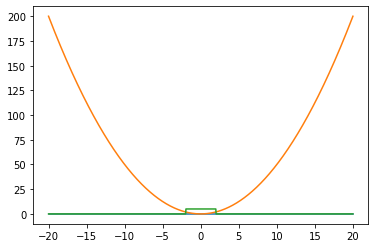

In [2]:
## On commence par former la liste de valeurs des vecteurs et V.

V = np.zeros(N) #potentiel nul
V2 = np.zeros(N) #potentiel harmonique
V3 = np.zeros(N) #barrière de potentiel

omega = 1
masse = 1
hbarre = 1

for i in range(N):
    V2[i] = masse*(omega*x[i])**2 / 2
    
energie_p = 5
for i in range(N):
    if i>(N/2-N*0.05) and i<(N/2+N*0.05):
        V3[i] = energie_p

plt.plot(x,V)
plt.plot(x,V2)
plt.plot(x,V3)

plt.show()

In [3]:
## Ensuite, on forme les matrices d et e diagonales principale et supérieure (resp) de H

def get_matrice(V):

    d = np.zeros(N)
    e= np.zeros(N-1)

    for i in range(V.size):
        d[i] = 2/(dx**2) + V[i]

    for i in range(e.size):
        e[i] = -1/(dx**2)
        
    return d,e

d,e = get_matrice(V)

In [4]:
from scipy.linalg import eigh_tridiagonal

## Puis, on calcule w et v respectivement les valeurs propres et vecteurs propres de H

w, v = eigh_tridiagonal(d,e)

In [5]:
# On doit désormais normaliser les vecteurs propres :

def normalize(m, dx):
    m /= np.linalg.norm(m,axis=0)
    m /= np.sqrt(dx)
    return m

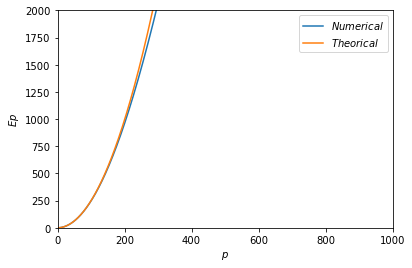

In [6]:
## On regarde la différence entre la courbe théorique et la courbe obtenu

p = np.arange(0,N,1)

Ep = np.zeros(N)
for i in range(N):
    Ep[i] = (np.pi*(i+1)/L)**2

plt.plot(p,w,label="$Numerical$")
plt.plot(p,Ep,label = "$Theorical$")
plt.xlabel('$p$')
plt.ylabel('$Ep$')
plt.xlim(0, 1000)
plt.ylim(0, 2000)
plt.legend()
plt.savefig('docs/statio/energie_num_vs_theoric_n%.i.pdf' %N,format='pdf')
plt.savefig('docs/statio/energie_num_vs_theoric_n%.i' %N)
plt.show()

In [7]:
# On compare le théorique et le calculé pour psi

def psi_theo(p):
    psi_theo = np.zeros(N)
    for i in range(N):
        if (p%2 == 0): #fonction pair
            psi_theo[i] = np.sqrt(2/L)*np.cos(((p+1)*np.pi*x[i])/(L*2))
        else: #fonction impair
            psi_theo[i] = np.sqrt(2/L)*np.sin(((p+1)*np.pi*x[i])/(L*2))
    return psi_theo

def energie_pot(p,w):
    value_ep = np.zeros(N)
    for i in range(value_ep.size):
        value_ep[i] = w[p]
    return value_ep

In [8]:
# On crée la fonction pour former psi à partir de V (dans le cas où V n'est plus le même)

def get_psi(V):
    d,e = get_matrice(V)
    
    w, v = eigh_tridiagonal(d,e)
    
    for vec in v:
        normalize(v,dx)
    v0 = np.zeros((N,N))
    for i in range(N):
        for y in range(N):            #On échange ligne et colonnes
            v0[i][y] = v[y][i]
    
    return w,v0

# On crée la fonction pour afficher les graphiques

def get_graph(w,v,name,theorical_psi):
    for i in range(2):
        plt.plot(x,v[i]+w[i],label="Numérique $p=%i$" %i)
        plt.plot(x,theorical_psi(i)+w[i],label = "Théorique $p=%i$" %i)
        plt.plot(x,energie_pot(i,w),"--",label = "Ep pour $p=%i$" %i)
    plt.xlabel('$x$')
    plt.ylabel('$\Psi(x)$')
    plt.title('Norme de $\Psi(x)$ en fonction de la position x (%i itérations)' %N)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.savefig('docs/statio/psi_fonction_de_x_%s_n%i.pdf' %(name,N),format='pdf')
    plt.savefig('docs/statio/psi_fonction_de_x_%s_n%i' %(name,N))
    plt.show()

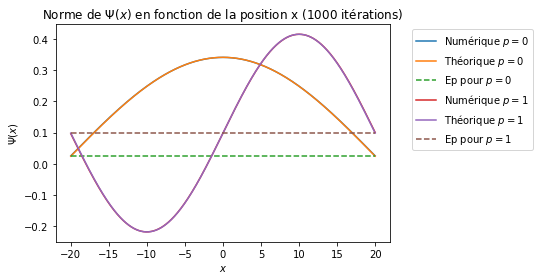

In [9]:
w,v = get_psi(V)

get_graph(w,v,"puit_infini",psi_theo)

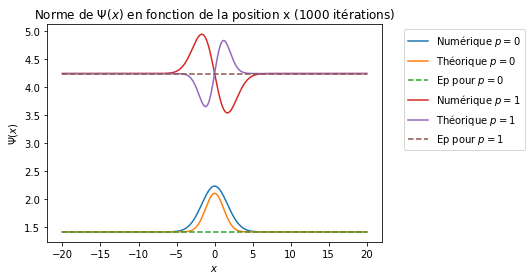

In [10]:
#potentiel harmonique 
def factoriel(x):
    if x <= 0:
        return 1
    else:
        return x*factoriel(x-1)

sigma = np.sqrt(np.sqrt(2))
#np.sqrt(hbarre/(masse*omega))
    
def psi_theo_harmo(p):
    psi_theo = np.zeros(N)
    p_hermite = special.hermite(p)
    
    for i in range(N):
        psi_theo[i] = (1/(np.sqrt(2**p*factoriel(p)*np.sqrt(np.pi)*sigma)))*np.exp((-x[i]**2)/(2*sigma**2))*p_hermite(x[i]/sigma)
    
    return psi_theo

w,v = get_psi(V2)

get_graph(w,v,"harmonique",psi_theo_harmo)

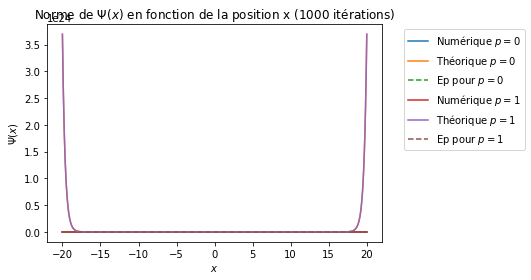

In [11]:
#barrière de potentiel

def psi_theo_barriere(p):
    psi_theo = np.zeros(N)
    energie = energie_p*0.8
    k = np.sqrt(2*masse*energie/(hbarre**2))
    
    for i in range(N):
        alpha = np.sqrt(2*(energie_p-energie))
        if i<(N/2-N*0.1):
            psi_theo[i] = np.exp(k*x[i]) + np.exp(-k*x[i])
        elif i<(N/2+N*0.1):
            psi_theo[i] = np.exp(alpha*x[i]) + np.exp(-alpha*x[i])
        else:
            psi_theo[i] = np.exp(k*x[i])
            
    return psi_theo
w,v = get_psi(V3)

get_graph(w,v,"barrière de potentiel",psi_theo_barriere)            